정보가 없음
1      100000.0
2      100000.0
3      100000.0
4      100000.0
5      100000.0
6      100500.0
7      100000.0
8      100000.0
9      100000.0
10     100500.0
11     101500.0
12     101500.0
13     101000.0
14     101500.0
15     101500.0
16     100000.0
17     100000.0
18     100000.0
19     100500.0
20     100500.0
21     100500.0
22      99900.0
23     100500.0
24     100500.0
25     100500.0
26     100500.0
27     100500.0
28     100500.0
29     100500.0
30     101000.0
         ...   
105    100500.0
106    100500.0
107    100500.0
108    101000.0
109    101000.0
110    101000.0
111    101000.0
112    101000.0
113    100500.0
114    100500.0
115    101500.0
116    101500.0
117    101500.0
118    102000.0
119    101500.0
120    102000.0
121    102000.0
122    102000.0
123    101500.0
124    101500.0
125    101000.0
126    101500.0
127    101000.0
128    101000.0
129    100500.0
130    101000.0
131    101500.0
132    101500.0
133    101500.0
134    101500.0
Name: b'CJ', Leng

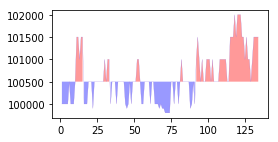

In [55]:
import pymysql
import pandas as pd
import math
import pandas_datareader.data as web
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import FinanceDataReader as fdr

connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840', db='geniuses777', charset='utf8')


# mysql과 연동하는 작업

# host가 있는 부분은 DBMS가 설치된 서버의 IP주소


curs = connection.cursor()
# DBMS의 커서를 제어하는 명령어

# Python에서 DBMS를 직접 제어할 수 있도록 도와준다.


# 데이터를 읽어와서 저장하는 작업

# feature : DBMS에 저장된 테이블의 이름이 들어갈 변수
def make_csv():

    # 컬럼 명을 가져오기 위한 작업
    column = []
    sql = "show full columns from realtime_data"
    curs.execute(sql)
    rows = curs.fetchall()
    for i in range(len(rows)):
        column.append(rows[i][0])



    # 본인이 DB의 컬럼 명이 필요가 없다면 위의

# 컬럼 며을 가져오는 작업은 넘어가도 된다.




    # 쿼리문을 직접 돌리는 작업
    sql = "select * from realtime_data"
    curs.execute(sql)
    rows = curs.fetchall()

    # 데이터 타입을 list형태로 바꿔주는 작업

    rows = list(rows)
    for a in range(len(rows)):
        rows[a] = list(rows[a])

    # DBMS에서 가져온 데이터는 튜플의 형태로 되어 있기 때문에

    # 위의 작업을 해야 데이터가 입력이 된다.



    # 데이터를 작성해서 저장하는 작업

    # CSV파일은 한글이 잘 깨지기 때문에 utf-8로 인코딩을 해주어야 한다.
    f = open('realtime_data.csv', 'w', encoding='utf-8', newline='')



    # CSV파일을 입력하기 위한 명령어
    wr = csv.writer(f)

    # 컬럼 명 입력
    wr.writerow(column)

    # 나머지 데이터 입력
    for i in range(len(rows)):
        wr.writerow(rows[i])
    f.close()
    # 연결 해제
    conn.close()

    # DBMS연결 해제

# 데이터를 읽어오는 작업
def open_csv():
    f = open('realtime_data.csv', 'r', encoding='utf-8')
    data = pd.read_csv(f)

    # 읽어온 데이터를 Pandas에서 제공하는 형식의 데이터로 저장한다.

    return data


if __name__ == "__main__":

    try:
        make_csv()
        data = open_csv()
        print(data)
    except:
        print("정보가 없음")

stock_file_name = 'realtime_data.csv'
encoding = 'euc-kr'
names = [b'TIME',b'CJ',b'LG',b'SK',b'DOOSAN',b'SAMSUNG',b'ASIANA',b'KAKAO',b'HANWHA',b'HYUNDAI',b'JINLO',b'NAVER',b'LGD']
raw_dataframe = pd.read_csv(stock_file_name, names=names, encoding=encoding)
raw_dataframe = raw_dataframe[1:]


z = raw_dataframe[b'CJ'].astype(np.float)

z2 = z.tail(168)
print(z2)
z3 = z2.median()
print(z3)

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
set_size(3, 1.5)
plt.plot(z2, color='mediumpurple', linewidth = 0.2)
plt.fill_between(z2.index, z3, z2, where=z2 >= z3, facecolor='red', alpha=0.4)
plt.fill_between(z2.index, z3, z2, where=z2 <= z3, facecolor='blue', alpha=0.4)
plt.show()
fig.savefig("./graph/CJ_real.png",dpi=300)

def convertToBinaryData(filename):
    with open(filename, 'rb') as file:
        binaryData = file.read()
    return binaryData

try:
    with connection.cursor() as cursor:
        sql = 'UPDATE stockdata SET `image` = %s WHERE `company_name` = %s'
        image = convertToBinaryData("D:\jupyter_project\graph\\CJ_real.png")
        cursor.execute(sql, (image, 'CJ'))        # 넣으려는 값
        connection.commit()
        
finally:
    connection.close()
